In [1]:
import numpy as np
import os 
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as pc
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

path = os.getcwd()

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

Durante este ciclado no pudimos medir las frecuencias porque el criostato duró en control de temperatura menos de lo previsto. Además, el sensor de temperatura se encuentra más arriba que el MKID, por lo que es posible que este se encuentre a una temperatura mayor realmente.

Vamos a realizar comparaciones del proceso de pérdida de control en este ciclado y en el anterior, para ver cómo ha influido exactamente.

- Comparar pendientes de la temp de 1K
- Comparar temp. de 1K a la que se pierde el control (lo sabemos porque la temp de 50mK comienza a subir)
- Comparar pendientes de la corriente del imán

#### Datos

Con el prefijo "_1" señalo los datos del primer test, con "_2" los del último test realizado, el del MKID

In [2]:

df_2 = pd.read_csv(path+'\Datos\PruebaCryo-MKID-1\s21051_SAT_MGB_2022_08_16_10;01.csv')
df_2 = df_2.drop(df_2.columns[20:], axis='columns')

temp_50K_2 = np.array(df_2.iloc[2:,7]).astype(float)
temp_3K_2 = np.array(df_2.iloc[2:,8]).astype(float)
temp_GGG_2 = np.array(df_2.iloc[2:,5]).astype(float)
temp_FAA_2 = np.array(df_2.iloc[2:,3]).astype(float)
time_2 = np.array(df_2.iloc[2:,2]).astype(float)
temp_magnet_2 = np.array(df_2.iloc[2:,9]).astype(float)
i_mag_2 = np.array(df_2.iloc[2:,12]).astype(float)


C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_8632\1158225187.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(path+'\Datos\PruebaCryo-MKID-1\s21051_SAT_MGB_2022_08_16_10;01.csv')


In [3]:

df_1 = pd.read_csv(path+'\Datos\Test_1_Cryo.csv')

temp_50K_1 = np.array(df_1.iloc[2:,7]).astype(float)
temp_3K_1 = np.array(df_1.iloc[2:,8]).astype(float)
temp_GGG_1 = np.array(df_1.iloc[2:,5]).astype(float)
temp_FAA_1 = np.array(df_1.iloc[2:,3]).astype(float)
time_1 = np.array(df_1.iloc[2:,2]).astype(float)
temp_magnet_1 = np.array(df_1.iloc[2:,9]).astype(float)
i_mag_1 = np.array(df_1.iloc[2:,12]).astype(float)


C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_8632\1692784926.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(path+'\Datos\Test_1_Cryo.csv')


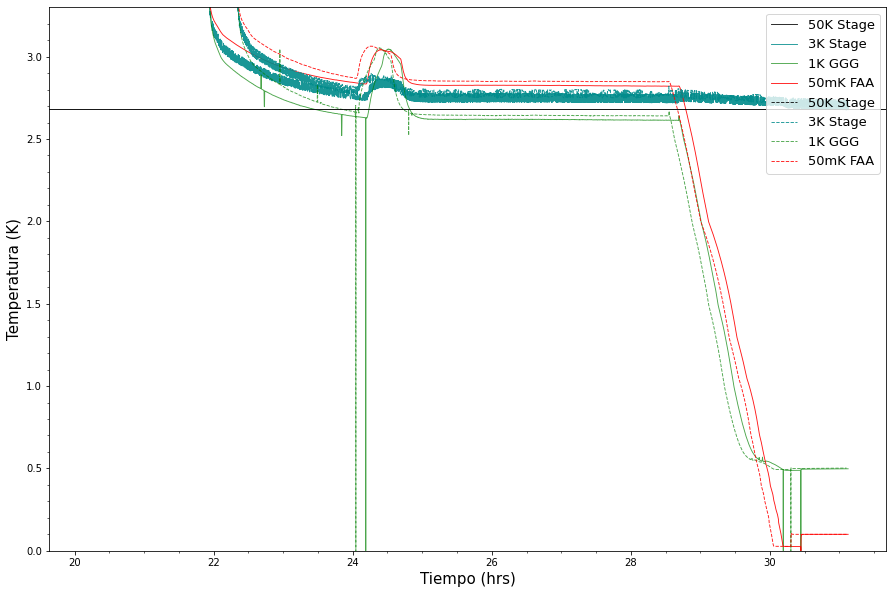

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

i, j = 6300, 18000

plt.plot(time_1[i:j],temp_50K_1[i:j], color='black', alpha=0.9, linewidth=0.9, label='50K Stage')
plt.plot(time_1[i:j],temp_3K_1[i:j], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time_1[i:j],temp_GGG_1[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time_1[i:j],temp_FAA_1[i:j], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  

i, j = 12500, 18000

plt.plot(time_2[i:j],temp_50K_2[i:j], color='black', alpha=0.9, linestyle='dashed', linewidth=0.9, label='50K Stage')
plt.plot(time_2[i:j],temp_3K_2[i:j], color='darkcyan', alpha=0.9, linestyle='dashed',linewidth=0.9, label='3K Stage')
plt.plot(time_2[i:j],temp_GGG_2[i:j], color='green', alpha=0.7, linestyle='dashed',linewidth=0.9, label='1K GGG')  
plt.plot(time_2[i:j],temp_FAA_2[i:j], color='red', alpha=0.9, linestyle='dashed',linewidth=0.9, label='50mK FAA')  

plt.ylim(0,3.3)
plt.minorticks_on()  
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='upper right')


plt.show()

#### Punto de pérdida de control

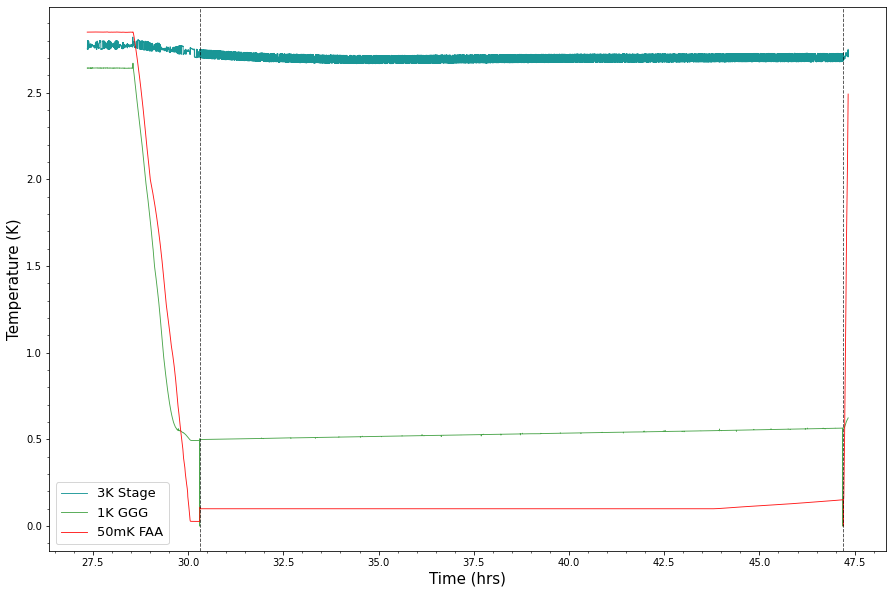

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))

i, j = 16000, 28150 

plt.plot(time_2[i:j],temp_3K_2[i:j], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time_2[i:j],temp_GGG_2[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time_2[i:j],temp_FAA_2[i:j], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  

plt.axvline(x=30.3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(x=47.2, color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')
plt.legend()

plt.show()

Miro en qué momento comienza a subir la temp de la etapa de 50mK

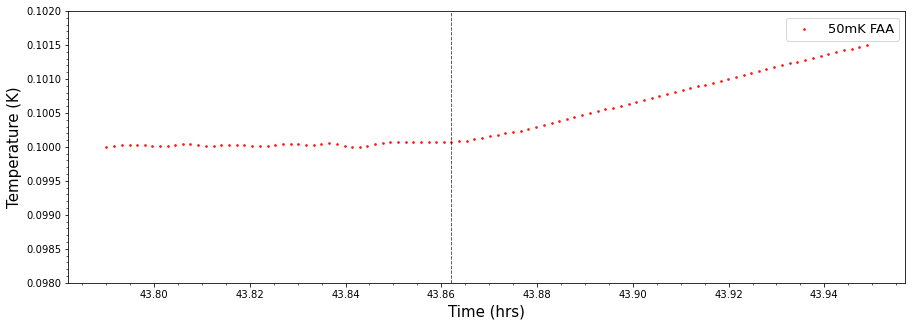

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

i, j = 25950, 26050
k = 25995

plt.scatter(time_2[i:j],temp_FAA_2[i:j], color='red', alpha=0.8, s=3, label='50mK FAA')  

plt.axvline(x=time_2[k], color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.ylim(0.098,0.102)
plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')
plt.legend()

plt.show()

In [19]:
print(temp_magnet_2[k])
print(time_2[k])

2.63
43.862084


A las **43.86 horas** (índice 25995), con unas temperaturas de:

- Etapa 50mK -  **0.100094 K**
- Etapa 1K   -  **0.5505034 K**
- Etapa 3K   -  **2.722 K**
- Etapa 50K  -  **48.802 K**

Ahora debo hacerlo para los datos del anterior test y ver si coinciden

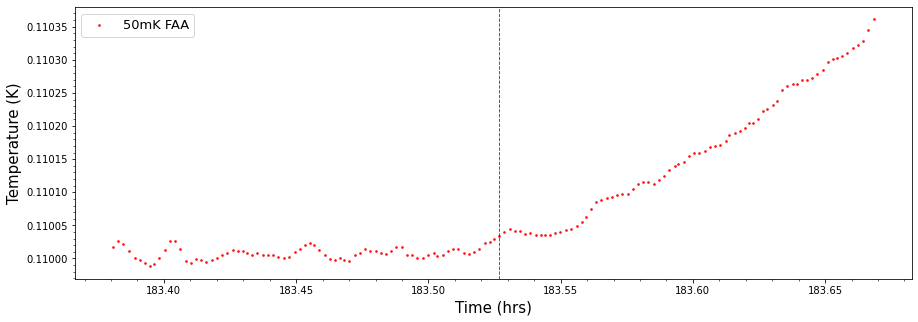

In [202]:
fig, ax = plt.subplots(figsize=(15, 5))

i, j = 254800, 254950

plt.scatter(time_1[i:j],temp_FAA_1[i:j], color='red', alpha=0.8, s=3, label='50mK FAA')  

plt.axvline(x=time_1[254875], color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')
plt.legend()

plt.show()

In [6]:
temp_magnet_1[254875]

2.621

A las **183.526712 horas** (índice 254875), con unas temperaturas de:

- Etapa 50mK -  **0.110034 K**
- Etapa 1K   -  **0.831027 K**
- Etapa 3K   -  **2.671 K**
- Etapa 50K  -  **48.07 K**

In [215]:
data = {
        'Etapa': ['50mK',   '1K',  '3K', '50K'],
        'Temperatura (K) Test 1':[temp_FAA_1[254875], temp_GGG_1[254875], temp_3K_1[254875], temp_50K_1[254875]],
        'Temperatura (K) Test 2':[temp_FAA_2[25997], temp_GGG_2[25997], temp_3K_2[25997], temp_50K_2[25997]]
        }

table = pd.DataFrame(data)
table = table.pivot_table(values= ['Temperatura (K) Test 1','Temperatura (K) Test 2'],
                  index=['Etapa'])
display(table)

,Temperatura (K) Test 1,Temperatura (K) Test 2
Etapa,,
1K,0.831027,0.550503
3K,2.671000,2.722000
50K,48.070000,48.802000
50mK,0.110034,0.100094


#### Pendiente de subida de temp de 1K

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 2 (MKID) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Correlación Pearson: r=0.9996331459351451, p-value=0.0
{'polynomial': [array([0.0038316 , 0.38301897]), array([[ 1.04151921e-12, -4.03154974e-11],
       [-4.03154974e-11,  1.58429613e-09]])]}


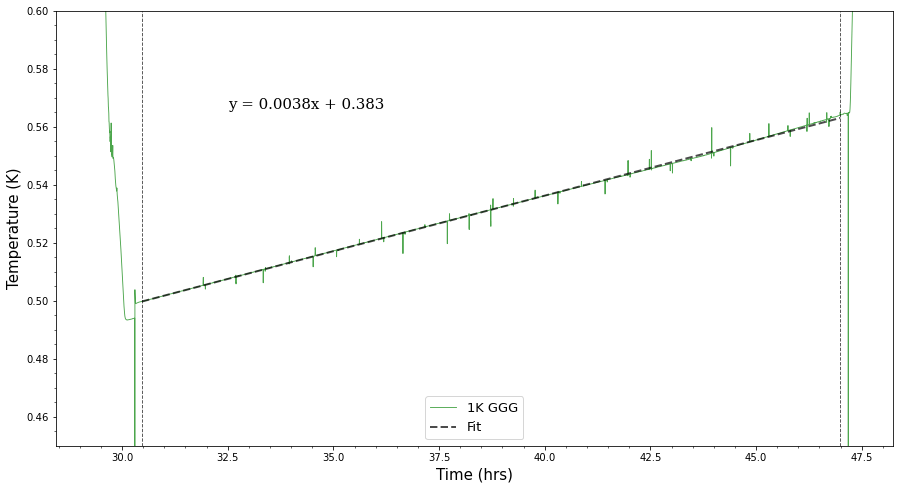

In [182]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 2 (MKID) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15, 8))

i, j = 17000, 28150 
l, k = 17600, 27950

plt.plot(time_2[i:j],temp_GGG_2[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  

plt.axvline(x=time_2[l], color='black', alpha=0.7, linewidth=0.9, linestyle='--') #30.3 h
plt.axvline(x=time_2[k], color='black', alpha=0.7, linewidth=0.9, linestyle='--') # 47.2 h

plt.ylim(0.45,0.6)
plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

# Cálculo de correlación y significancia con Scipy
t = time_2[l:k]
T = temp_GGG_2[l:k]
r, p = stats.pearsonr(t, T)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")

# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(t, T, 1)
print(p)


x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.legend()

plt.text(32.5,0.57, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

m2, n2 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (1º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Correlación Pearson: r=0.9961623910677535, p-value=0.0
{'polynomial': [array([0.00354941, 0.38932451]), array([[ 1.35079263e-12, -6.82964794e-11],
       [-6.82964794e-11,  3.63045388e-09]])]}


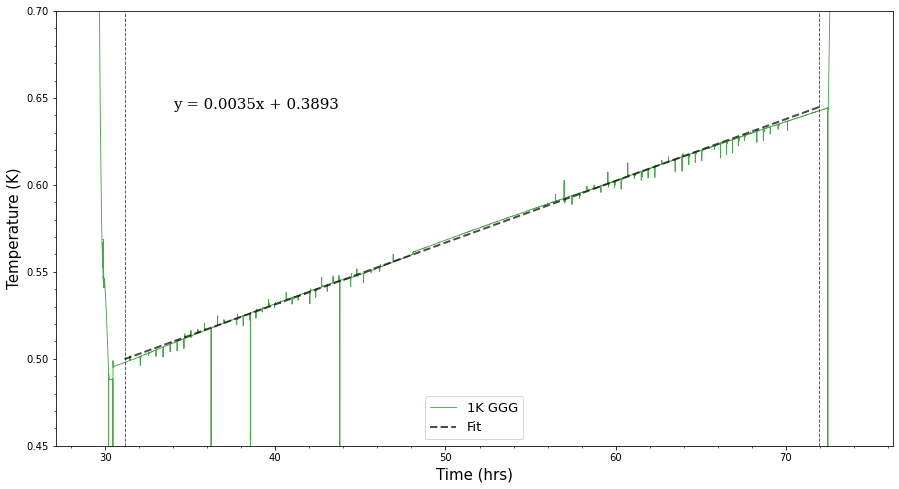

In [183]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (1º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15, 8))

i, j = 15000, 93000
l, k = 18000, 90000

plt.plot(time_1[i:j],temp_GGG_1[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  

plt.axvline(x=time_1[l], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 
plt.axvline(x=time_1[k], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 

plt.ylim(0.45,0.7)
plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

# Cálculo de correlación y significancia con Scipy
t = time_1[l:k]
T = temp_GGG_1[l:k]
r, p = stats.pearsonr(t, T)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")

# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(t, T, 1)
print(p)


x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.legend()

plt.text(34,0.65, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

m11, n11 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (2º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Correlación Pearson: r=0.9995818989317846, p-value=0.0
{'polynomial': [array([0.00322058, 0.24509273]), array([[ 5.56329634e-14, -7.05790846e-12],
       [-7.05790846e-12,  9.44136865e-10]])]}


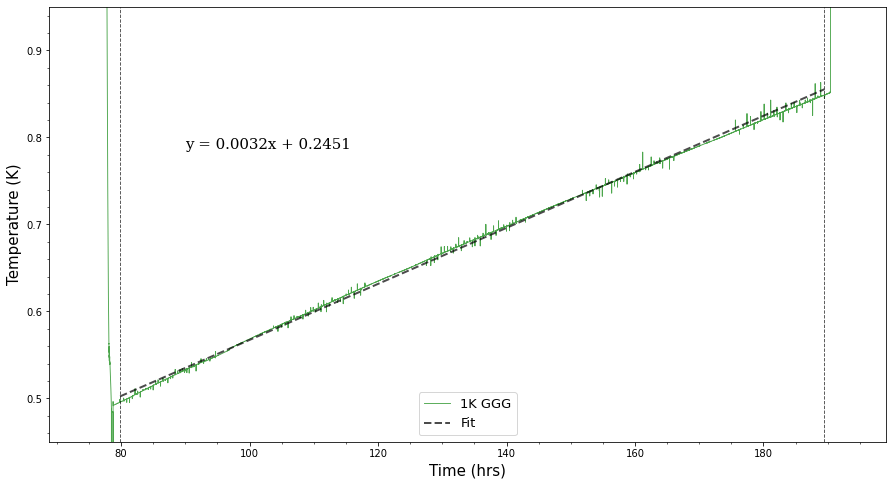

In [184]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (2º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15, 8))

i, j = 94000, 260000
l, k = 102000, 258000

plt.plot(time_1[i:j],temp_GGG_1[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  

plt.axvline(x=time_1[l], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 
plt.axvline(x=time_1[k], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 

plt.ylim(0.45,0.95)
plt.minorticks_on()  
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

# Cálculo de correlación y significancia con Scipy
t = time_1[l:k]
T = temp_GGG_1[l:k]
r, p = stats.pearsonr(t, T)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")

# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(t, T, 1)
print(p)


x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.legend()

plt.text(90,0.8, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

m12, n12 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)

In [185]:
data = {'Test':    ['1','1','2'],
        'Control': ['1º',   '2º',  '-'],
        'Ordenada':    [n11,n12,n2],
        'Pendiente': [m11,m12,m2]
        }

table = pd.DataFrame(data)
table = table.pivot_table(values= ['Ordenada','Pendiente'],
                  index=['Test','Control'])
display(table)


Ordenada  Pendiente
Test Control                     
1    1º         0.3893    0.00355
     2º         0.2451    0.00322
2    -          0.3830    0.00383


Lo que sí es que parece que esta vez el sensor de la etapa de 1K no ha sufrido tantos picos a cero como en el test anterior

#### Pendiente de bajada de la corriente del imán

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 2 (MKID) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Correlación Pearson: r=-0.9989231688991491, p-value=0.0
{'polynomial': [array([-0.0270136 ,  1.21757472]), array([[ 2.24941996e-10, -8.10413894e-09],
       [-8.10413894e-09,  2.94304443e-07]])]}


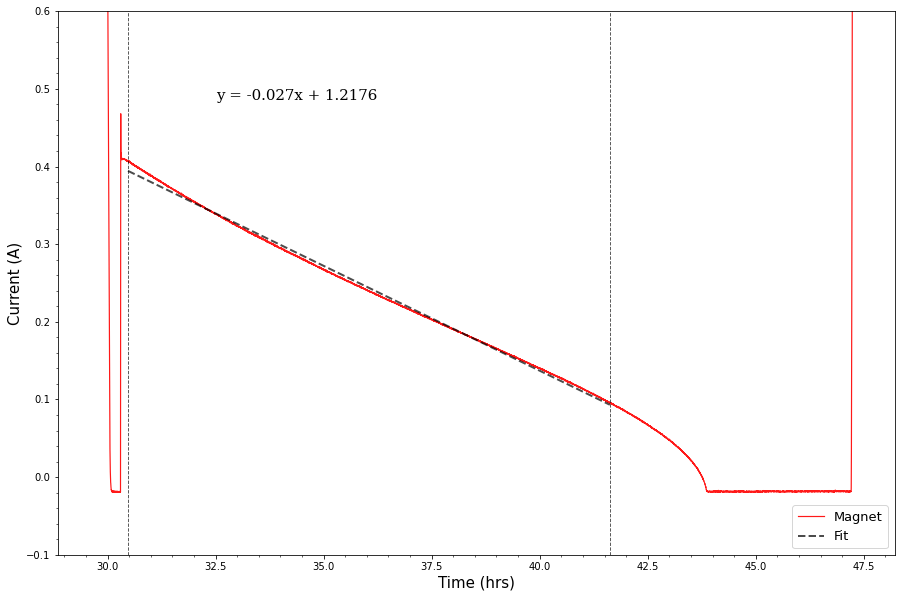

In [228]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 2 (MKID) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15,10))

i, j = 17200, 28150  
l, k = 17600, 24600

plt.plot(time_2[i:j],i_mag_2[i:j], color='red', alpha=0.9, linewidth=1.2, label='Magnet')  

plt.axvline(x=time_2[l], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 
plt.axvline(x=time_2[k], color='black', alpha=0.7, linewidth=0.9, linestyle='--') 

plt.minorticks_on()
plt.xlabel('Time (hrs)')
plt.ylabel('Current (A)')
plt.ylim(-0.1,0.6)


# Cálculo de correlación y significancia con Scipy
t = time_2[l:k]
i = i_mag_2[l:k]
r, p = stats.pearsonr(t, i)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")

# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(t, i, 1)
print(p)


x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.legend()

plt.text(32.5,0.5, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.show()

mi2, ni2 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (1º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



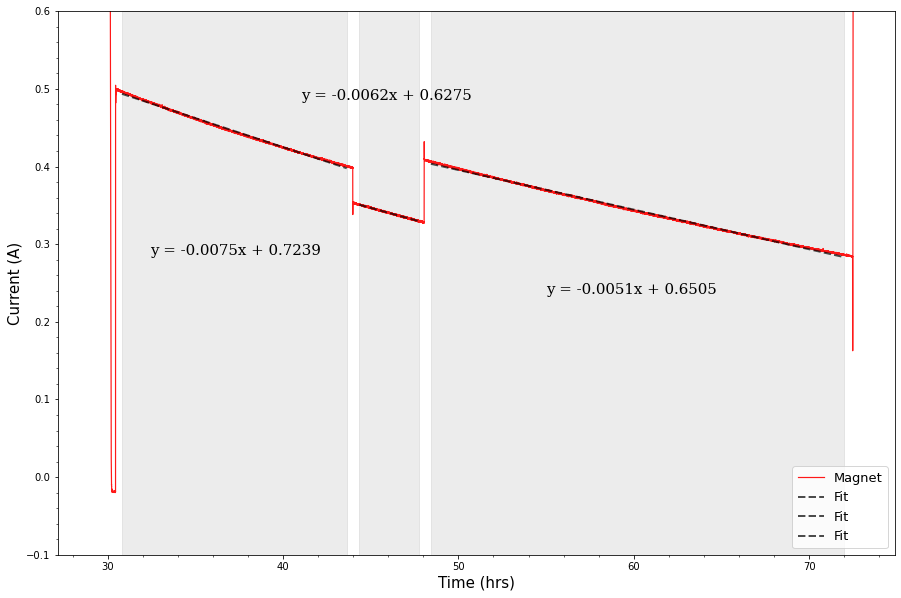

In [267]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (1º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15,10))

i, j = 15000, 91000
l, k, r, s, v, b = 17400, 41450, 42800, 49100, 50400, 90000

plt.plot(time_1[i:j],i_mag_1[i:j], color='red', alpha=0.9, linewidth=1.2, label='Magnet')  

plt.axvspan(time_1[l], time_1[k], alpha=0.15, color='grey')
plt.axvspan(time_1[r], time_1[s], alpha=0.15, color='grey')
plt.axvspan(time_1[v], time_1[b], alpha=0.15, color='grey')

plt.minorticks_on()
plt.xlabel('Time (hrs)')
plt.ylabel('Current (A)')
plt.ylim(-0.1,0.6)


# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results


## Ajuste control 100mK
t = time_1[l:k]
i = i_mag_1[l:k]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(32.4,0.3, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi11_100, ni11_100 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)



## Ajuste control 90mK
t = time_1[r:s]
i = i_mag_1[r:s]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(41,0.5, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi11_90, ni11_90 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)



## Ajuste control 90mK
t = time_1[v:b]
i = i_mag_1[v:b]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(55,0.25, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi11_110, ni11_110 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)


plt.legend()
plt.show()



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (2º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



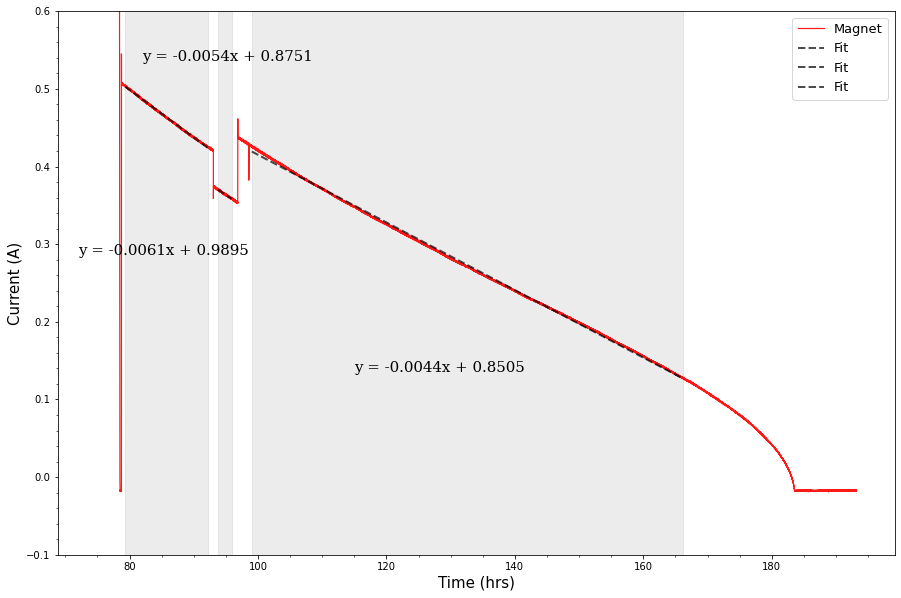

In [288]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Test 1 (2º Control) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

fig, ax = plt.subplots(figsize=(15,10))

i, j = 94000, 260000
l, k, r, s, v, b = 101000, 125000, 128000, 132000, 137800, 240000

plt.plot(time_1[i:j],i_mag_1[i:j], color='red', alpha=0.9, linewidth=1.2, label='Magnet')  

plt.axvspan(time_1[l], time_1[k], alpha=0.15, color='grey')
plt.axvspan(time_1[r], time_1[s], alpha=0.15, color='grey')
plt.axvspan(time_1[v], time_1[b], alpha=0.15, color='grey')

plt.minorticks_on()
plt.xlabel('Time (hrs)')
plt.ylabel('Current (A)')
plt.ylim(-0.1,0.6)


## Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results


## Ajuste control 100mK
t = time_1[l:k]
i = i_mag_1[l:k]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(72,0.3, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi12_100, ni12_100 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)



## Ajuste control 90mK
t = time_1[r:s]
i = i_mag_1[r:s]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(82,0.55, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi12_90, ni12_90 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)



## Ajuste control 90mK
t = time_1[v:b]
i = i_mag_1[v:b]

p = polyfit(t, i, 1)

x = np.linspace(t.min(),t.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='--', alpha=0.7, linewidth=2, color = 'black', label='Fit')

plt.text(115,0.15, 
         'y = '+str(round(p['polynomial'][0][0],4))+'x + '+str(round(p['polynomial'][0][1],4)), 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

mi12_110, ni12_110 = round(p['polynomial'][0][0],5), round(p['polynomial'][0][1],4)


plt.legend()
plt.show()


In [292]:
data = {'Test':      ['1','1','1','1','1','1','2'],
        'Control':   ['1º','1º','1º','2º','2º','2º','-'],
        'Temp (mK)': ['90','100','110','90','100','110','100'],
        'Pendiente': [mi11_90,mi11_100,mi11_110,mi12_90,mi12_100,mi12_110,mi2]
        }

table = pd.DataFrame(data)
table = table.pivot_table(values= ['Pendiente'],
                  index=['Test','Control','Temp (mK)'])
display(table)


Pendiente
Test Control Temp (mK)           
1    1º      100         -0.00747
             110         -0.00510
             90          -0.00624
     2º      100         -0.00613
             110         -0.00435
             90          -0.00539
2    -       100         -0.02701